### Klasifikasi model (Logistics model) dengan dataset CitarumWater.csv

Kode yang diberikan bertujuan untuk mempersiapkan analisis klasifikasi menggunakan regresi logistik dengan memanfaatkan dataset yang diunggah. Pertama, beberapa library penting diimpor, termasuk pandas untuk manipulasi data, sklearn untuk model klasifikasi dan evaluasi, serta matplotlib untuk visualisasi. Setelah itu, pengguna diizinkan untuk mengunggah file CSV yang berisi dataset melalui Google Colab dengan menggunakan `files.upload()`. Dataset yang diunggah kemudian dimuat ke dalam DataFrame df menggunakan `pd.read_csv`. Setelah memuat data, kode ini mencetak lima baris pertama dari DataFrame dengan `df.head()` untuk memberikan gambaran awal tentang struktur dan isi dataset. Langkah-langkah ini mempersiapkan pengguna untuk melakukan pemrosesan lebih lanjut, seperti pengkodean label, membagi data, dan melatih model klasifikasi.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('CitarumWater.csv')

print(df.head())

Saving CitarumWater.csv to CitarumWater.csv
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


Kode ini berfungsi untuk memeriksa dan mempersiapkan dataset untuk analisis klasifikasi dengan melakukan beberapa langkah pemrosesan data. Pertama, df.dtypes digunakan untuk menampilkan tipe data dari setiap kolom dalam DataFrame df, memberikan informasi mengenai jenis data yang ada. Selanjutnya, baris yang mengandung nilai kosong (NaN) dihapus dari DataFrame dengan menggunakan `df.dropna()`, sehingga hanya baris yang lengkap yang akan digunakan dalam analisis, menghindari potensi masalah yang disebabkan oleh data yang hilang. Kemudian, objek LabelEncoder diinisialisasi untuk mengonversi kolom-kolom yang berisi data kategorikal menjadi format numerik, yang diperlukan untuk model klasifikasi. Dengan menggunakan loop, setiap kolom dalam DataFrame diperiksa; jika kolom tersebut memiliki tipe data objek *(yang biasanya menunjukkan data kategorikal)*, maka kolom tersebut diubah menjadi format numerik dengan metode `fit_transform()`. Langkah-langkah ini memastikan bahwa data siap untuk digunakan dalam model klasifikasi, seperti regresi logistik, dengan semua fitur dalam format yang sesuai.

In [2]:
print(df.dtypes)

df = df.dropna()

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

No                 int64
NamaSungai        object
TitikPantau       object
Waktu             object
pH               float64
Temp              object
TSS              float64
DO               float64
BOD              float64
COD              float64
Nitrat           float64
FecalColiform    float64
Fosfat           float64
O2                object
IP               float64
Class              int64
dtype: object


Kode ini bertujuan untuk mempersiapkan data untuk model klasifikasi dengan memisahkan fitur dan target, serta membagi dataset menjadi set pelatihan dan pengujian. Pertama, variabel X didefinisikan dengan menghapus kolom 'Class' dari DataFrame df menggunakan `df.drop('Class', axis=1)`, sehingga X berisi semua fitur yang akan digunakan untuk memprediksi kelas target. Variabel y diisi dengan kolom 'Class', yang merupakan label atau target yang ingin diprediksi. Selanjutnya, dataset dibagi menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split,** di mana 80% dari data digunakan untuk pelatihan (X_train dan y_train) dan 20% untuk pengujian (X_test dan y_test)**. Parameter `random_state=42` digunakan untuk memastikan bahwa pembagian data ini dapat direproduksi di masa mendatang. Dengan langkah-langkah ini, data siap untuk digunakan dalam melatih model klasifikasi dan mengevaluasi kinerjanya.

In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kode ini digunakan untuk melatih model klasifikasi menggunakan regresi logistik dengan dataset yang telah dipersiapkan sebelumnya. Pertama, objek clf dibuat dengan menginisialisasi kelas `LogisticRegression()` dari pustaka sklearn, di mana **parameter** `max_iter=10000` ditetapkan untuk memastikan bahwa model memiliki cukup iterasi untuk konvergensi saat dilatih. Kemudian, metode `fit(X_train, y_train)` dipanggil pada objek clf, di mana X_train berisi fitur-fitur dari data pelatihan dan y_train berisi label target yang sesuai. Proses ini memungkinkan model untuk belajar dari data pelatihan, mengidentifikasi pola yang ada, dan mengoptimalkan parameter internalnya untuk memprediksi kelas target. Setelah langkah ini, model regresi logistik siap digunakan untuk membuat prediksi pada data baru atau data pengujian.

In [4]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

Kode ini digunakan untuk menghasilkan prediksi dari model regresi logistik yang telah dilatih sebelumnya. Pertama, `metode predict(X_test)` dipanggil pada objek clf untuk menghasilkan prediksi kelas untuk data pengujian, dengan hasil disimpan dalam variabel y_pred. Nilai-nilai ini merepresentasikan kelas yang diprediksi berdasarkan fitur-fitur dalam X_test. Selanjutnya, metode `predict_proba(X_test)` digunakan untuk mendapatkan probabilitas prediksi untuk setiap kelas, di mana `[:, 1]` digunakan untuk mengambil probabilitas dari kelas positif `(kelas dengan indeks 1)`. Hasil ini disimpan dalam variabel y_pred_proba, yang akan berguna untuk evaluasi lebih lanjut, seperti menghitung metrik kinerja yang melibatkan probabilitas, seperti kurva ROC dan nilai AUC. Dengan langkah-langkah ini, pengguna dapat mengevaluasi seberapa baik model melakukan klasifikasi pada data yang belum pernah dilihat sebelumnya.

In [5]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Kode ini digunakan untuk mengevaluasi kinerja model klasifikasi yang telah dilatih dengan menghitung beberapa metrik penting. Pertama, `accuracy_score(y_test, y_pred)` digunakan untuk menghitung akurasi, yang merupakan proporsi prediksi yang benar dari seluruh data pengujian. Selanjutnya, metrik presisi dihitung dengan menggunakan `precision_score(y_test, y_pred, average='weighted')`, yang memberikan rasio prediksi positif yang benar dibandingkan dengan seluruh prediksi positif, dengan bobot berdasarkan jumlah masing-masing kelas. Demikian pula, `recall_score(y_test, y_pred, average='weighted')` menghitung recall, yang merupakan rasio prediksi positif yang benar dibandingkan dengan seluruh instance positif sebenarnya. Terakhir, `f1_score(y_test, y_pred, average='weighted')` menghitung nilai F1, yang merupakan rata-rata harmonis dari presisi dan recall, memberikan satu metrik tunggal yang mempertimbangkan kedua aspek tersebut. Dengan menghitung metrik-metrik ini, pengguna dapat menilai seberapa efektif model dalam klasifikasi dan memahami trade-off antara presisi dan recall.

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

Kode ini bertujuan untuk menampilkan hasil evaluasi kinerja model klasifikasi dengan mencetak beberapa metrik yang telah dihitung sebelumnya. Menggunakan fungsi `print()`, setiap metrik—akurasi, presisi, recall, dan nilai F1—dijelaskan dengan format yang jelas dan mudah dibaca, di mana nilai masing-masing metrik ditampilkan dengan empat angka desimal. Dengan menampilkan informasi ini, pengguna dapat dengan cepat memahami seberapa baik model dalam mengklasifikasikan data pengujian. Akurasi memberikan gambaran umum tentang proporsi prediksi yang benar, sedangkan presisi dan recall memberikan wawasan lebih dalam tentang kinerja model dalam menangani kelas positif. Nilai F1 menggabungkan kedua metrik tersebut, sehingga memberikan ukuran yang seimbang antara presisi dan recall. Dengan cara ini, pengguna dapat mengevaluasi efektivitas model secara keseluruhan dan membuat keputusan yang lebih baik terkait penerapan model dalam konteks yang lebih luas.

In [7]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9400
Precision: 0.9398
Recall: 0.9400
F1 Score: 0.9397


Kode ini digunakan untuk menghitung kurva **Receiver Operating Characteristic (ROC) dan Area Under the Curve (AUC)** untuk model klasifikasi yang telah dilatih. Pertama, fungsi `roc_curve(y_test, y_pred_proba, pos_label=1)` digunakan untuk menghitung *false positive rate (fpr), true positive rate (tpr), dan threshold yang berbeda berdasarkan probabilitas prediksi kelas positif (y_pred_proba)*. Di sini, `pos_label=1` menunjukkan bahwa kelas positif adalah label 1. Dengan nilai-nilai fpr dan tpr yang diperoleh, AUC dihitung menggunakan fungsi auc(fpr, tpr), yang memberikan ukuran seberapa baik model dapat memisahkan antara kelas positif dan negatif. Nilai AUC berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang lebih baik dalam membedakan antara kedua kelas. Dengan langkah-langkah ini, pengguna dapat mengevaluasi kinerja model secara visual dan numerik, serta membandingkannya dengan model lain berdasarkan kemampuan klasifikasi mereka.

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

Kode ini digunakan untuk memvisualisasikan kurva Receiver Operating Characteristic (ROC) sebagai alat evaluasi untuk model klasifikasi yang telah dilatih. Pertama, sebuah figure baru dengan ukuran 8x6 inci dibuat menggunakan plt.figure(). Kemudian, kurva ROC digambar dengan memplot true positive rate (TPR) terhadap false positive rate (FPR) menggunakan plt.plot(), di mana warna garis ditetapkan merah, lebar garis 2, dan label mencantumkan nilai AUC yang telah dihitung sebelumnya. Sebagai referensi, garis diagonal yang menunjukkan kinerja acak digambar dengan menggunakan` plt.plot([0, 1], [0, 1], ...)`, yang akan membentuk garis putus-putus. Setelah itu, batas sumbu x dan y diatur untuk memastikan bahwa grafik berada dalam rentang 0 hingga 1. Label sumbu x dan y, serta judul grafik ditambahkan untuk memberikan konteks yang jelas. Legenda juga disertakan di sudut kanan bawah untuk mengidentifikasi kurva ROC. Akhirnya, plt.show() digunakan untuk menampilkan grafik tersebut. Dengan visualisasi ini, pengguna dapat dengan mudah menilai kinerja model dalam membedakan antara kelas positif dan negatif berdasarkan probabilitas prediksi.

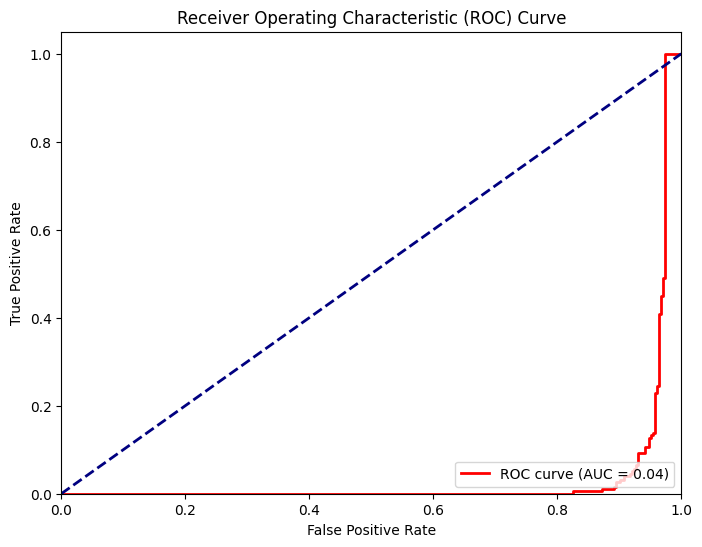

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()